## Improving a model

First prediction = baseline prediction
First model = baseline model

From data perspective:
* Could we collect more data. (generally,the more data, the better)
* Can we improve data? (adding more reliable features)

From a model perspective:
* Is there a better model we can use?  (Refer - sklearn ml map)
* Could we imporove our model?  (Tuning Hyperparameters)

Parameters vs HyperParameters
* Parameters :- model find these patterns
* Hyperparameters :- settings on model we can adjust(potentially) to improve its ability to find patterns

Three ways to adjust Hyperparameters:-
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Hyperparameters to tune:-
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_pred labels 
    on a classification model.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy' : round(accuracy,2), 
                   'precision' : round(precision,2),
                   'recall' : round(recall,2),
                   'f1' : round(f1,2)}
    print(f'Acc : {accuracy *100:.2f}%')
    print(f'Precision : {precision *100:.2f}%')
    print(f'Recall : {recall *100.:2f}%')
    print(f'F1 : {f1 *100:.2f}%')
    
    return metric_dict

In [6]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_disease_shuffled = heart_disease.sample(frac = 1)
heart_disease_shuffled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1


## Tuning Hyperparameters By Hand

In [8]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(9)

X = heart_disease_shuffled.drop('target',axis = 1)
y = heart_disease_shuffled['target']

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split + 0.15*len(heart_disease_shuffled))

X_train, y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_valid)

baseline_metrices = evaluate_preds(y_valid,y_preds)
baseline_metrices

Acc : 77.78%
Precision : 73.08%
Recall : 86.363636%
F1 : 79.17%


{'accuracy': 0.78, 'precision': 0.73, 'recall': 0.86, 'f1': 0.79}

In [9]:
clf_2 = RandomForestClassifier(max_depth=20)
clf_2.fit(X_train,y_train)
y_preds_2 = clf_2.predict(X_valid)

clf_2_metrices = evaluate_preds(y_valid,y_preds_2)
clf_2_metrices

Acc : 75.56%
Precision : 70.37%
Recall : 86.363636%
F1 : 77.55%


{'accuracy': 0.76, 'precision': 0.7, 'recall': 0.86, 'f1': 0.78}

## Tuning Hyperparameters By RandomSearchCV

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
grid = {'n_estimators' : [10,100,200,500,1000,1200],
        'max_depth' : [None,5,10,20,30],
        'max_features' : ['auto','sqrt'],
        'min_samples_split' : [2,4,6],
        'min_samples_leaf' : [1,2,4]}

np.random.seed(9)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter = 10, #number of models to try
                            cv=5, verbose=2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.5s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.5s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.5s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.6s
[CV] n_estimators=200, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [11]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [12]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrices = evaluate_preds(y_test,rs_y_preds)
rs_metrices

Acc : 88.52%
Precision : 86.49%
Recall : 94.117647%
F1 : 90.14%


{'accuracy': 0.89, 'precision': 0.86, 'recall': 0.94, 'f1': 0.9}

## Tuning Hyperparameters By GridSearchCV

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
grid_2 = {'n_estimators' : [10,100,200],
        'max_depth' : [30],
        'max_features' : ['auto','sqrt'],
        'min_samples_split' : [4],
        'min_samples_leaf' : [2,4]}

np.random.seed(9)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5, verbose=2)
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.0s finished


In [17]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrices = evaluate_preds(y_test,gs_y_preds)
gs_metrices

Acc : 90.16%
Precision : 86.84%
Recall : 97.058824%
F1 : 91.67%


{'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}

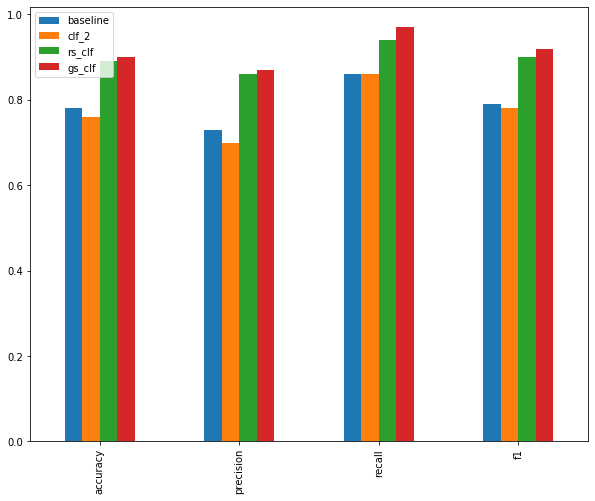

In [20]:
compare_metric = pd.DataFrame({'baseline':baseline_metrices,
                               'clf_2' : clf_2_metrices,
                               'rs_clf' : rs_metrices,
                               'gs_clf' : gs_metrices})

compare_metric.plot.bar(figsize = (10,8))